### Exercise 2

Fit a straight line to the following data points, using all three methods used above.


x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Plots using code taken from - https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb

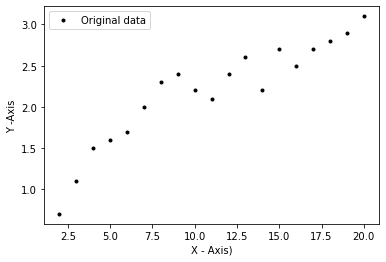

In [13]:
# np array used to convert to int for subsequent code

x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])

y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])


# Plot the original data
plt.plot(x, y, 'k.', label='Original data')


# Add axis labels and a legend.
plt.xlabel('X - Axis)')
plt.ylabel('Y -Axis')
plt.legend()

# Show the plot.
plt.show()

#### Best Line Fit

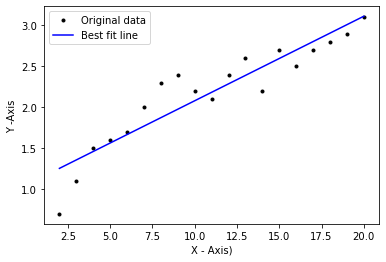

In [14]:
# Using built in function polyfit

m, c = np.polyfit(x, y, 1)


# Plot the original data
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m*x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('X - Axis)')
plt.ylabel('Y -Axis')
plt.legend()

# Show the plot.
plt.show()

#### Optimization

In [16]:
import scipy.optimize as so

In [20]:
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [23]:
cost((5.0, 10.0))

88639.75

In [24]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [25]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786014998399, 1.04947405671058)

In [26]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(0.10315789473684209, 1.0494736842105254)

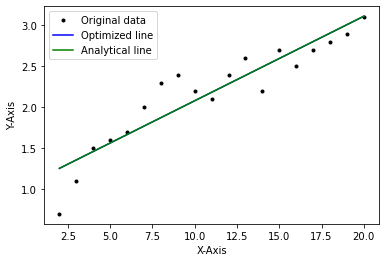

In [30]:
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
plt.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

# Show the plot.
plt.show()

#### Curve Fit

In [32]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c

In [33]:
# Run curve_fit.
result = so.curve_fit(f, x, y)

In [34]:
# Look at the result.
result



(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [35]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

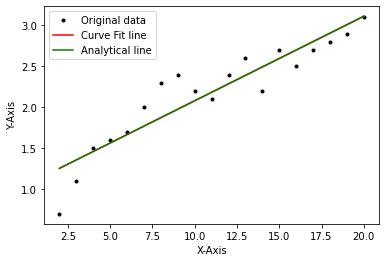

In [36]:
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
plt.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.legend()

# Show the plot.
plt.show()

#### Do you think a straight line is a good model for these points?

"A line of best fit is a straight line drawn through the maximum number of points on a scatter plot balancing about an equal number of points above and below the line."
https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit-eyeball-method

From reviewing the plots above, we can see that it meets this criteria, there are 10 points above and 9 below so I can conclude that a straight line is a good fit for these points.